In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from basis import lprior

In [2]:
def prior(x):
    return np.exp([lprior(np.array((xi))) for xi in x])

In [3]:
def conf_int(sam,conf=95):
    betas = sam[:,0]
    conf_betas = (np.percentile(betas,(100-conf)/2),
                  np.percentile(betas,(100+conf)/2))
    gammas = sam[:,1]
    conf_gammas = (np.percentile(gammas,(100-conf)/2),
                  np.percentile(gammas,(100+conf)/2))
    gammas = sam[:,2]
    conf_act = (np.percentile(gammas,(100-conf)/2),
                  np.percentile(gammas,(100+conf)/2))
    gammas = sam[:,3]
    conf_deac = (np.percentile(gammas,(100-conf)/2),
                  np.percentile(gammas,(100+conf)/2))
    return conf_betas,conf_gammas,conf_act,conf_deac

In [4]:
def stats(sam):
    mean = sam.mean(axis=0)
    conf_50 = conf_int(sam,50)
    conf_95 = conf_int(sam)
    return mean,conf_50,conf_95

In [5]:
def x_lim(bins):
    return [bins[0],bins[-1]] + np.array((-.1,.05))*(bins[-1]-bins[0])

In [6]:
def hist(ax,sam,bins,label):
    g0 = ax[0].hist(sam[:,0],bins=bins[0],density=True)
    ax[0].set_xlim(x_lim(bins[0]))
    #ax[0].plot(bins[0],prior(bins[0]),label = 'prior')
    
    g1 = ax[1].hist(sam[:,1],bins=bins[1],density=True)
    ax[1].set_xlim(bins[1][0],bins[1][-1])
    #ax[1].plot(bins[1],prior(bins[1]),label = 'prior')

    
    g2 = ax[2].hist(sam[:,2],bins=bins[2],density=True)
    ax[2].set_xlim(bins[2][0],bins[2][-1])
    #ax[2].plot(bins[2],prior(bins[1]),label = 'prior')
    
    g3 = ax[3].hist(sam[:,3],bins=bins[3],density=True)
    ax[3].set_xlim(bins[3][0],bins[3][-1])
    #ax[2].plot(bins[2],prior(bins[1]),label = 'prior')
    
    meanb,c50b,c95b = stats(sam)

    if label:
        ax[0].axvline(beta,color='y', label = 'gt')
        ax[1].axvline(1,color='y')    
        ax[2].axvline(2,color='y')    
        ax[3].axvline(1,color='y')   
        
        ax[0].axvline(meanb[0],color='r',label = 'expected')
        ax[1].axvline(meanb[1],color='r')
        ax[2].axvline(meanb[2],color='r')
        ax[3].axvline(meanb[3],color='r')
    
        ax[0].fill_between(c50b[0],(0,0),(g0[0].max(),g0[0].max()),color='r',alpha=.5,label='50%confidence')
        ax[0].fill_between((c95b[0][0],c50b[0][0]),(0,0),(g0[0].max(),g0[0].max()),color='r',alpha=.2,label='95%confidence')
    else:
        ax[0].axvline(beta,color='y')
        ax[1].axvline(1,color='y')    
        ax[2].axvline(2,color='y')    
        ax[3].axvline(1,color='y')    
        
        ax[0].axvline(meanb[0],color='r')
        ax[1].axvline(meanb[1],color='r')
        ax[2].axvline(meanb[2],color='r')
        ax[3].axvline(meanb[3],color='r')

        ax[0].fill_between(c50b[0],(0,0),(g0[0].max(),g0[0].max()),color='r',alpha=.5)
        ax[0].fill_between((c95b[0][0],c50b[0][0]),(0,0),(g0[0].max(),g0[0].max()),color='r',alpha=.2)
        
    ax[0].fill_between((c95b[0][1],c50b[0][1]),(0,0),(g0[0].max(),g0[0].max()),color='r',alpha=.2)
    ax[1].fill_between(c50b[1],(0,0),(g1[0].max(),g1[0].max()),color='r',alpha=.5)
    ax[1].fill_between((c95b[1][0],c50b[1][0]),(0,0),(g1[0].max(),g1[0].max()),color='r',alpha=.2)
    ax[1].fill_between((c95b[1][1],c50b[1][1]),(0,0),(g1[0].max(),g1[0].max()),color='r',alpha=.2)

    ax[2].fill_between(c50b[2],(0,0),(g2[0].max(),g2[0].max()),color='r',alpha=.5)
    ax[2].fill_between((c95b[2][0],c50b[2][0]),(0,0),(g2[0].max(),g2[0].max()),color='r',alpha=.2)
    ax[2].fill_between((c95b[2][1],c50b[2][1]),(0,0),(g2[0].max(),g2[0].max()),color='r',alpha=.2)

    ax[3].fill_between(c50b[3],(0,0),(g3[0].max(),g3[0].max()),color='r',alpha=.5)
    ax[3].fill_between((c95b[3][0],c50b[3][0]),(0,0),(g3[0].max(),g3[0].max()),color='r',alpha=.2)
    ax[3].fill_between((c95b[3][1],c50b[3][1]),(0,0),(g3[0].max(),g3[0].max()),color='r',alpha=.2)

In [7]:
    
def make_graphs_2():
    imu_sam  = pd.read_csv('inference/2S_IMU_inference_beta={}.csv'.format(beta)).to_numpy()
    ieu_sam = pd.read_csv('inference/2S_IEU_inference_beta={}.csv'.format(beta)).to_numpy()[:len(imu_sam)]
    rk_sam  = pd.read_csv('inference/2S_RK_inference_beta={}.csv'.format(beta)).to_numpy()[:len(imu_sam)]
    #me_sam  = pd.read_csv('inference/ME_inference_beta={}.csv'.format(beta)).to_numpy()[:len(imu_sam)]
    print(len(imu_sam))

    fig,ax = plt.subplots(3,4,figsize=(18,6))

    bins0 = np.linspace(imu_sam[:,0].min(),imu_sam[:,0].max(),25)
    bins1 = np.linspace(imu_sam[:,1].min(),imu_sam[:,1].max(),25)
    bins2 = np.linspace(imu_sam[:,2].min(),imu_sam[:,2].max(),25)
    bins3 = np.linspace(imu_sam[:,3].min(),imu_sam[:,3].max(),25)
    
    
    label=True
    for (axi,sam) in zip(ax,(ieu_sam,imu_sam,rk_sam)):
        hist(axi,sam,(bins0,bins1,bins2,bins3),label)
        label=False

    for (axi,method) in zip(ax,('IEU','IMU','RK')):
        axi[0].set_ylabel(method)

    ax[-1][0].set_xlabel(r'$\beta$',fontsize=18)
    ax[-1][1].set_xlabel(r'$\gamma$',fontsize=18)
    ax[-1][2].set_xlabel(r'$\lambda_{act}$',fontsize=18)
    ax[-1][3].set_xlabel(r'$\lambda_{ina}$',fontsize=18)

    fig.legend(loc=8,ncol=4,bbox_to_anchor=(.55,1.001))
    fig.tight_layout()

    fig.savefig('fig4/fig_beta={}.png'.format(beta),dpi=300,bbox_inches="tight")

    [print(str(stats(sam)[1])+'/n')for sam in (ieu_sam,imu_sam,rk_sam)]

250000
((99.30153190923345, 101.44890237687675), (0.985284868844668, 1.009514649669419), (1.958132567322593, 2.0396132287936943), (1.0039098055148092, 1.068038534937003))/n
((98.45794376080192, 100.87499773870138), (0.9760023202974136, 1.0038137949345893), (1.9485680129964553, 2.0139927979792254), (0.9996923409865327, 1.054276888059925))/n
((98.37828495008998, 100.75660060505128), (0.9754964109422872, 1.0024501961542045), (1.945224472680164, 2.010501778843449), (0.9976964854821824, 1.0535920776799343))/n


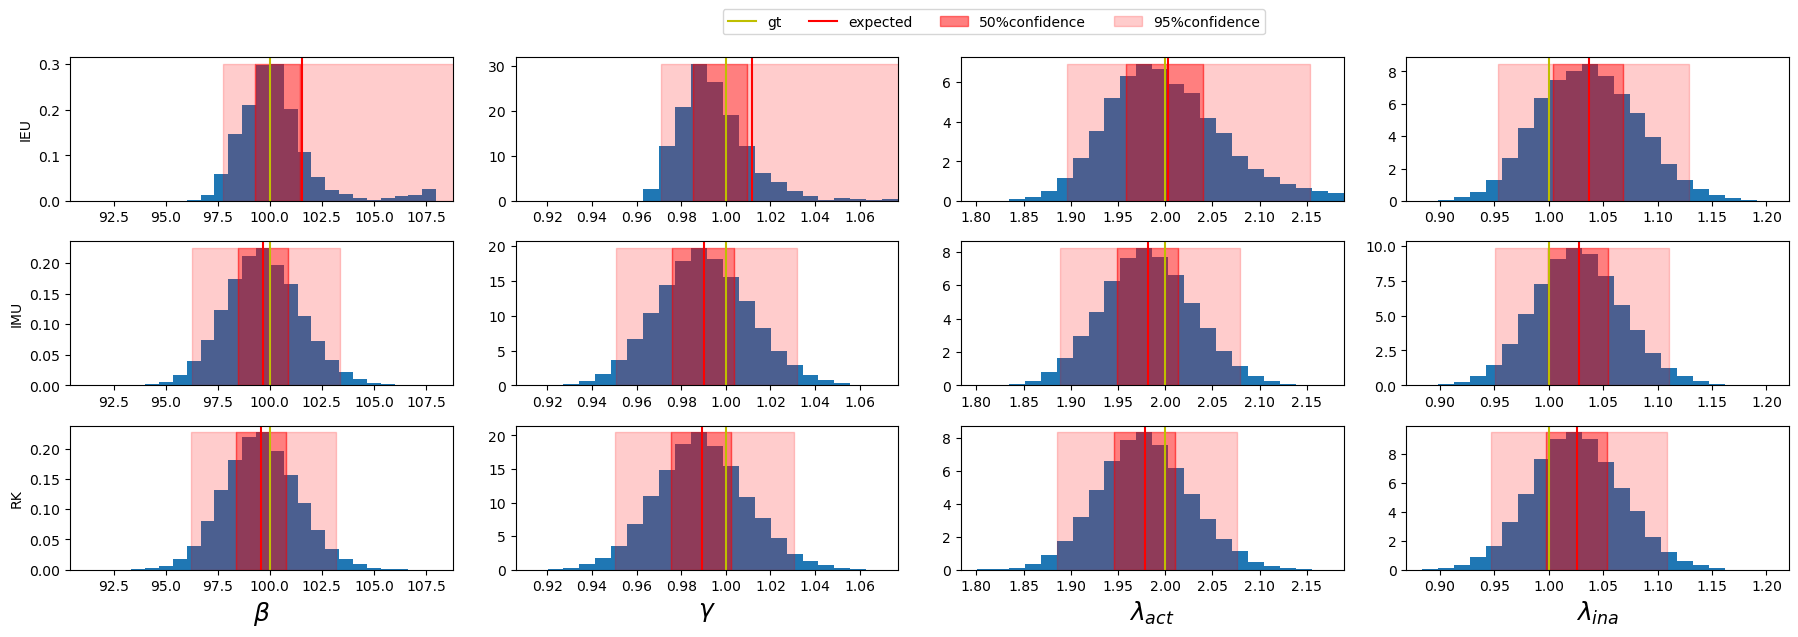

In [8]:
beta=100
make_graphs_2()

In [9]:
def autocorrelation(x):
    N = x.size
    mean = x.mean()
    xc = x-mean
    var = xc.var()

    k_array = np.arange(N/2,dtype=int)
    den = np.array([ (xc[:N-k]*xc[k:]).mean() for k in k_array])
    return den/var

In [10]:
def AC_graphs_2():
    imu_sam  = pd.read_csv('inference/2S_IMU_inference_beta={}.csv'.format(beta)).to_numpy()
    ieu_sam = pd.read_csv('inference/2S_IEU_inference_beta={}.csv'.format(beta)).to_numpy()[:len(imu_sam)]
    #rk_sam  = pd.read_csv('inference/2S_RK_inference_beta={}.csv'.format(beta)).to_numpy()[:len(imu_sam)]

    fig,ax = plt.subplots(2,4,figsize=(9,4))


    label=True
    for (axi,sam) in zip(ax,(ieu_sam,imu_sam)):
        [axi[i].plot(autocorrelation(sam[:,i])) for i in range(4)]
        label=False

    for (axi,method) in zip(ax,('IEU','IMU','RK')):
        axi[0].set_ylabel(method)
    
    #for i in range(4):
        #xlim = ax[0][i].get_xlim
        #ax[0][i].set_xlim(0,50000)
        #ax[1][i].set_xlim(0,50000)

    ax[-1][0].set_xlabel(r'$\beta$',fontsize=18)
    ax[-1][1].set_xlabel(r'$\gamma$',fontsize=18)
    ax[-1][2].set_xlabel(r'$\lambda_{act}$',fontsize=18)
    ax[-1][3].set_xlabel(r'$\lambda_{ina}$',fontsize=18)
    fig.supylabel('Autocorrelation')

    fig.legend(loc=8,ncol=4,bbox_to_anchor=(.55,1.001))
    fig.tight_layout()

    fig.savefig('fig4/ac_beta_corr={}.png'.format(beta),dpi=300,bbox_inches="tight")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


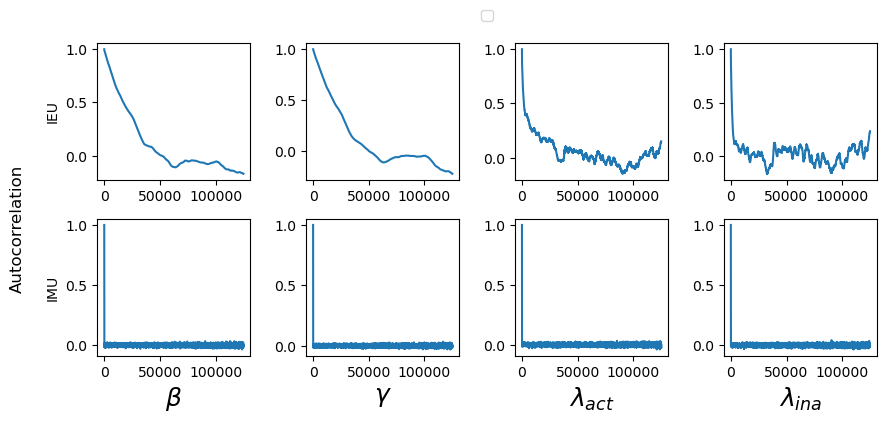

In [11]:
beta=100
AC_graphs_2()